In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
dataset = pd.read_csv('Restaurant_Dataset.csv')
dataset.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [215]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [216]:
dataset.shape

(9551, 21)

In [217]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [218]:
dataset = dataset.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude', 'Average Cost for two', 'Currency', 'Switch to order menu', 'Rating color'], axis = 1)
dataset.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",Yes,No,No,3,4.8,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,Yes,No,No,3,4.5,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",Yes,No,No,4,4.4,Very Good,270
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",No,No,No,4,4.9,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",Yes,No,No,4,4.8,Excellent,229


In [219]:
dataset.isna().sum()

Restaurant Name        0
Country Code           0
City                   0
Locality               0
Cuisines               9
Has Table booking      0
Has Online delivery    0
Is delivering now      0
Price range            0
Aggregate rating       0
Rating text            0
Votes                  0
dtype: int64

In [220]:
dataset = dataset.dropna()

In [221]:
dataset.isna().sum()

Restaurant Name        0
Country Code           0
City                   0
Locality               0
Cuisines               0
Has Table booking      0
Has Online delivery    0
Is delivering now      0
Price range            0
Aggregate rating       0
Rating text            0
Votes                  0
dtype: int64

In [222]:
dataset.duplicated().sum()

3

In [223]:
dataset = dataset.drop_duplicates()

In [224]:
dataset.duplicated().sum()

0

In [225]:
dataset['Restaurant Name'].unique

<bound method Series.unique of 0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                Ceviz A��ac۱
9548                       Huqqa
9549                 A���k Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9539, dtype: object>

In [226]:
sns.set(style='dark')

TypeError: 'Axes' object is not iterable

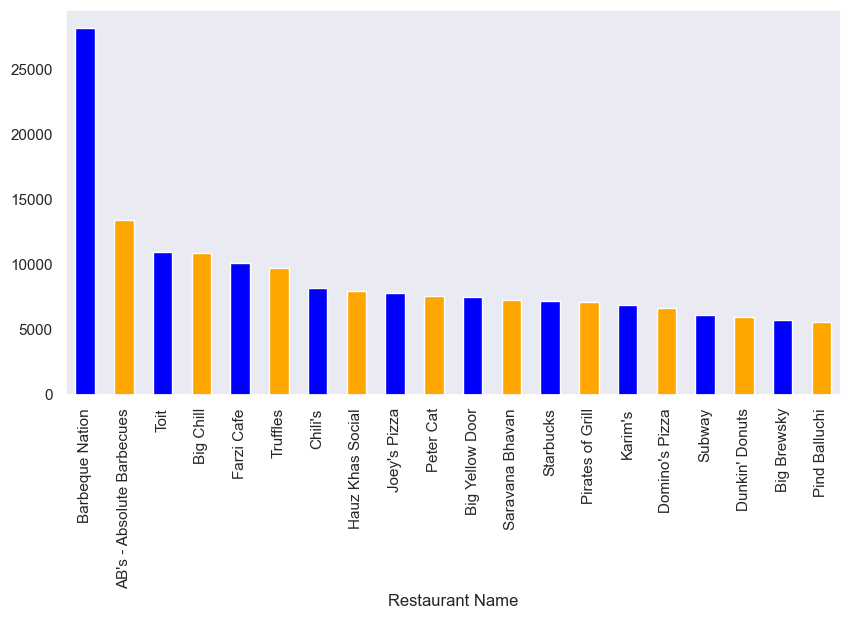

In [227]:
counts = dataset.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False).head(20).plot(kind='bar', color=['blue', 'orange'], figsize=(10,5))
ax = counts
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)
plt.title('Restaurant and vote')
plt.xlabel('Restaurant')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

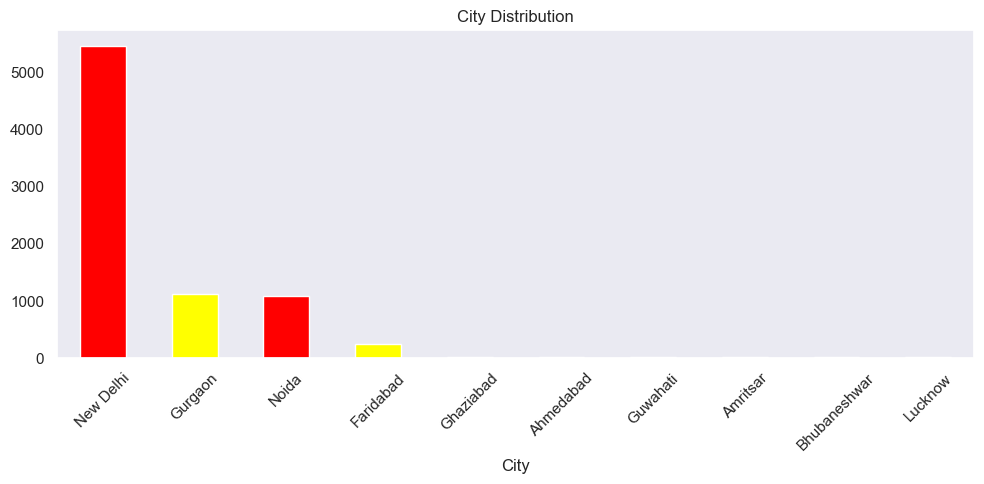

In [ ]:
counts = dataset['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color=['red', 'yellow'], figsize=(10, 5))
ax = counts
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

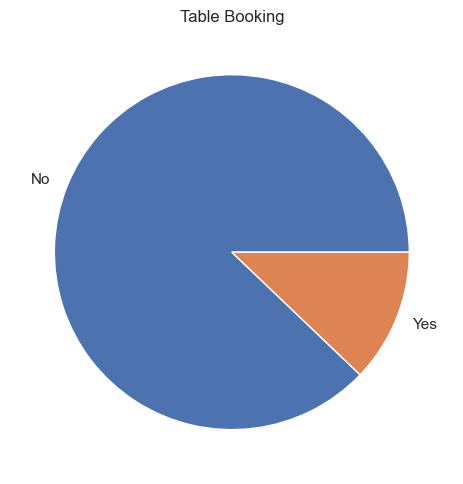

In [ ]:
dataset['Has Table booking'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})',  # shows % and counts
    figsize=(6,6)
)
plt.title('Table Booking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

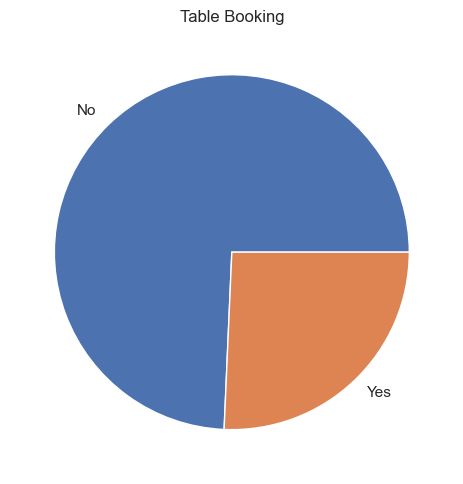

In [ ]:
dataset['Has Table booking'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})',  # shows % and counts
    figsize=(6,6)
)
plt.title('Table Booking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

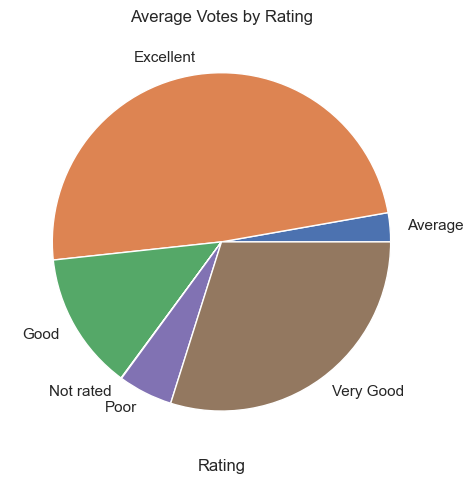

In [ ]:
dataset('Rating text')['Votes'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})',  # shows % and counts
    figsize=(6,6)
)
plt.title('Average Votes by Rating')
plt.xlabel('Rating')
plt.ylabel('')
plt.tight_layout()
plt.show()

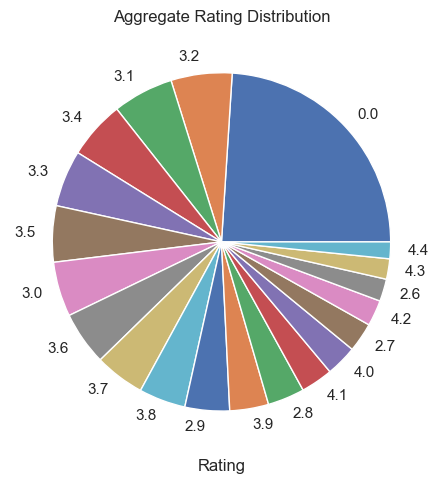

In [ ]:
dataset['Aggregate rating'].value_counts().sort_values(ascending=False).head(20).plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})',  # shows % and counts
    figsize=(6,6)
)
plt.title('Aggregate Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Average Rating by Restaurant '}, xlabel='Restaurant', ylabel='Average Rating'>

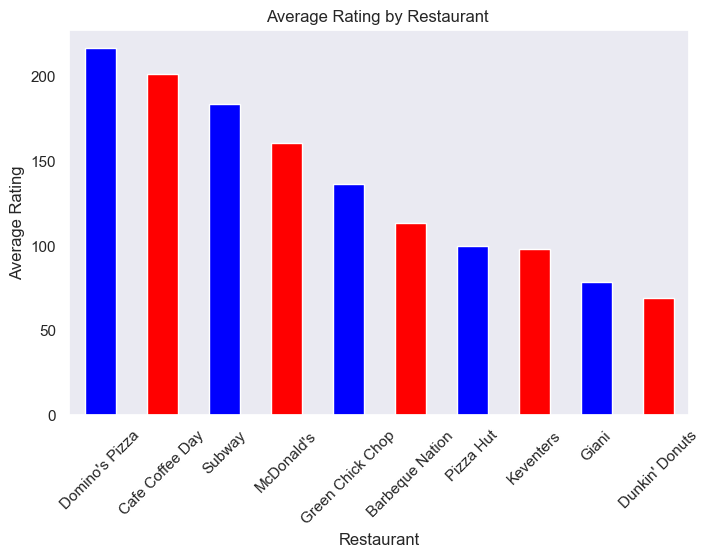

In [ ]:
counts = dataset.groupby('Restaurant Name')['Aggregate rating'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,5), color=['blue', 'red'], title='Average Rating by Restaurant ', xlabel='Restaurant', ylabel='Average Rating', rot=45)
ax = counts
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

In [ ]:
dataset.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",Yes,No,No,3,4.8,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,Yes,No,No,3,4.5,Excellent,591


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in range(len(dataset.columns)):
    if dataset.dtypes[i] == 'object':
        dataset[dataset.columns[i]] = encoder.fit_transform(dataset[dataset.columns[i]])

dataset.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,3742,162,73,171,920,1,0,0,3,4.8,1,314
1,3167,162,73,592,1111,1,0,0,3,4.5,1,591


In [ ]:
corr = dataset.corr()
corr

,Restaurant Name,Country Code,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
Restaurant Name,1.000000,0.020577,-0.002093,0.004072,0.051445,0.041147,0.028009,0.011993,0.061767,0.029430,0.012174,0.018514
Country Code,0.020577,1.000000,-0.178485,-0.119135,-0.135775,-0.060853,-0.153647,-0.018205,0.245338,0.281268,0.224599,0.154331
City,-0.002093,-0.178485,1.000000,0.094909,0.026414,-0.004054,0.011905,-0.014009,-0.104762,-0.130995,-0.099124,-0.078536
Locality,0.004072,-0.119135,0.094909,1.000000,0.007401,-0.065702,-0.031153,-0.007326,-0.114950,-0.173968,-0.037931,-0.124129
Cuisines,0.051445,-0.135775,0.026414,0.007401,1.000000,0.050836,-0.016366,0.007804,-0.005209,-0.081061,-0.079886,-0.032976
Has Table booking,0.041147,-0.060853,-0.004054,-0.065702,0.050836,1.000000,0.100980,-0.016845,0.502159,0.190242,0.044102,0.169583
Has Online delivery,0.028009,-0.153647,0.011905,-0.031153,-0.016366,0.100980,1.000000,0.101708,0.077801,0.226047,-0.080935,0.074470
Is delivering now,0.011993,-0.018205,-0.014009,-0.007326,0.007804,-0.016845,0.101708,1.000000,0.010929,0.019207,-0.031979,-0.001112
Price range,0.061767,0.245338,-0.104762,-0.114950,-0.005209,0.502159,0.077801,0.010929,1.000000,0.438319,0.163923,0.309448
Aggregate rating,0.029430,0.281268,-0.130995,-0.173968,-0.081061,0.190242,0.226047,0.019207,0.438319,1.000000,-0.182543,0.313432


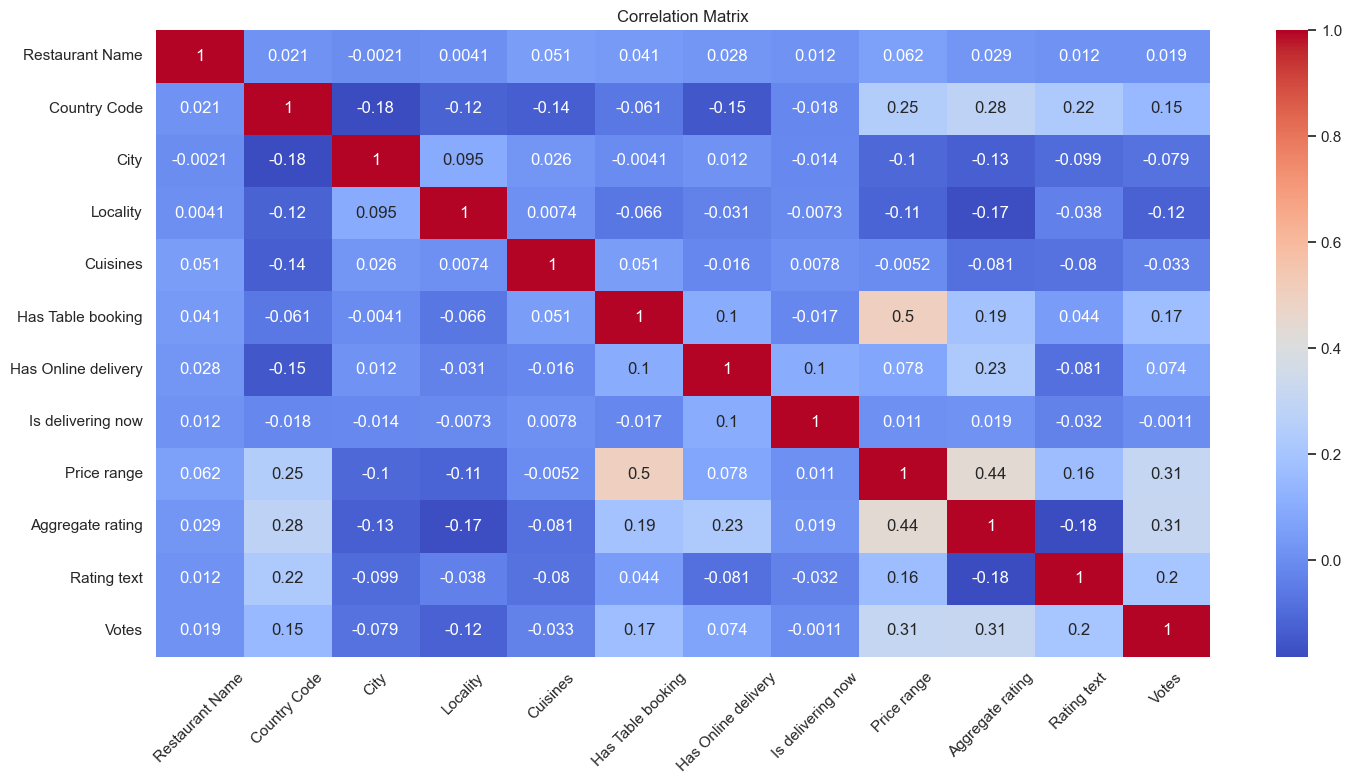

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
dataset.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,3742,162,73,171,920,1,0,0,3,4.8,1,314
1,3167,162,73,592,1111,1,0,0,3,4.5,1,591


In [ ]:
dataset = dataset[['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Rating text', 'Votes', 'Aggregate rating']]

In [ ]:
corr = dataset.corr()
corr

,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes,Aggregate rating
Has Table booking,1.000000,0.100980,-0.016845,0.502159,0.044102,0.169583,0.190242
Has Online delivery,0.100980,1.000000,0.101708,0.077801,-0.080935,0.074470,0.226047
Is delivering now,-0.016845,0.101708,1.000000,0.010929,-0.031979,-0.001112,0.019207
Price range,0.502159,0.077801,0.010929,1.000000,0.163923,0.309448,0.438319
Rating text,0.044102,-0.080935,-0.031979,0.163923,1.000000,0.203724,-0.182543
Votes,0.169583,0.074470,-0.001112,0.309448,0.203724,1.000000,0.313432
Aggregate rating,0.190242,0.226047,0.019207,0.438319,-0.182543,0.313432,1.000000


In [ ]:
x = dataset.drop(['Aggregate rating'], axis = 1)
y = dataset['Aggregate rating']
x
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9539, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print('\n\n')


from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

y_pred = dtr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print('\n\n')

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.13350605952362612
RMSE: 0.03802110356933176
R2: 0.983505278940996



MAE: 0.14460162794110373
RMSE: 0.04838910453683686
R2: 0.9790073220737887



MAE: 1.0124891180857023
RMSE: 1.496990805481317
R2: 0.3505594670790896


In [228]:
y_pred = rfr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[0.         0.        ]
 [2.81738512 3.4       ]
 [2.78150238 3.1       ]
 ...
 [3.755      3.6       ]
 [0.         0.        ]
 [2.95760954 3.        ]]


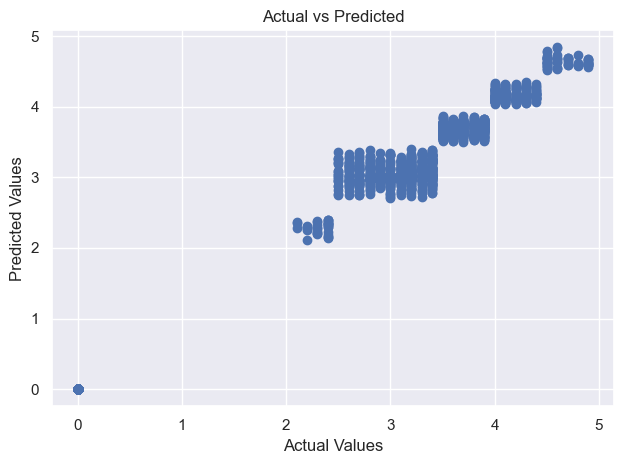

In [229]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [233]:
x.sample(5)

,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating text,Votes
7338,1,0,0,4,0,28
9311,0,0,0,4,2,86
676,0,0,0,3,0,151
6955,0,1,0,2,0,11
5793,0,0,0,1,3,0


In [241]:
y.iloc[9311]

4.1

In [242]:
user_input = [[0, 0, 0, 4, 2, 86]]
results = rfr_model.predict(user_input)[0]
print(f'Prediction {results:.2f}')

Prediction 4.25
